Dropping rows with null values in 'data_dte'...
Numeric Nulls in 'data_dte':
Series([], Name: data_dte, dtype: int64)
String Nulls in 'data_dte':
0         139
1         136
2          79
3         347
4         142
         ... 
930803    193
930804    122
930805    223
930806    257
930807    129
Name: data_dte, Length: 930808, dtype: int64
Dropping rows with null values in 'Year'...
Numeric Nulls in 'Year':
Series([], Name: Year, dtype: int64)
String Nulls in 'Year':
0         2006
1         2003
2         2007
3         2004
4         2009
          ... 
930803    2000
930804    2019
930805    2000
930806    2004
930807    1996
Name: Year, Length: 930808, dtype: int64
Dropping rows with null values in 'Month'...
Numeric Nulls in 'Month':
Series([], Name: Month, dtype: int64)
String Nulls in 'Month':
0          5
1          5
2          3
3         12
4          5
          ..
930803     7
930804     4
930805     8
930806     9
930807     5
Name: Month, Length: 930808, dtype: int64


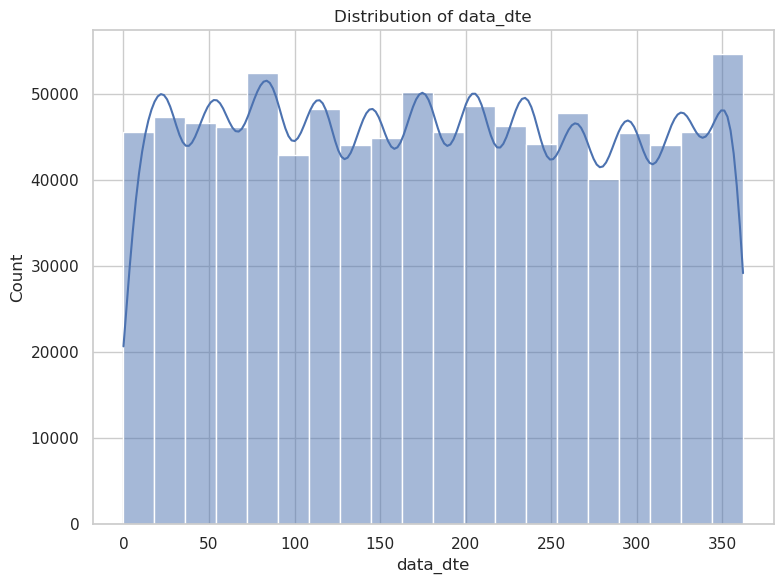

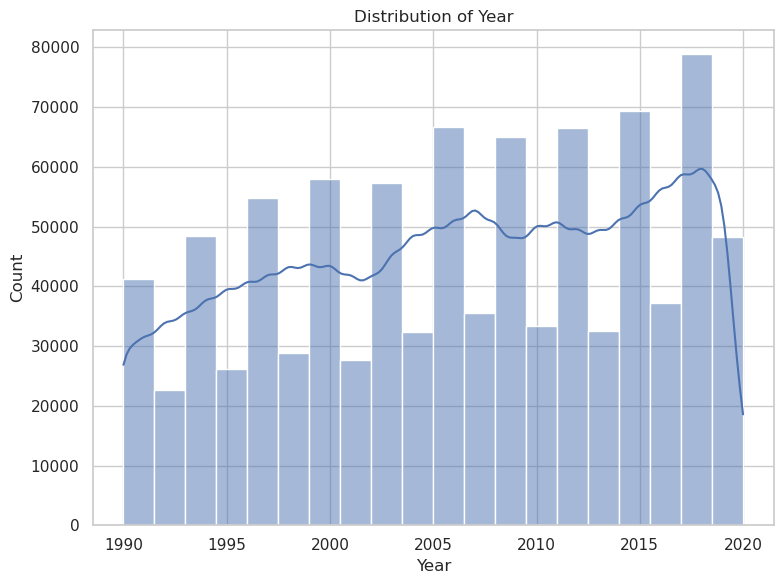

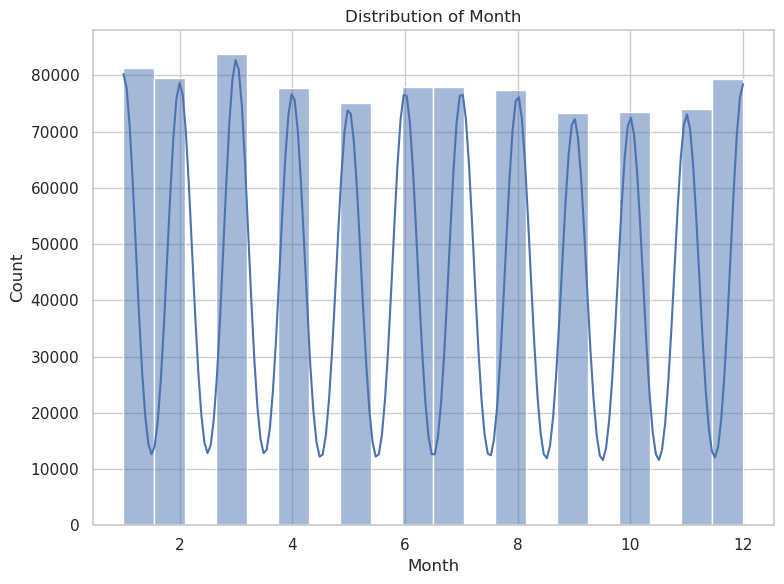

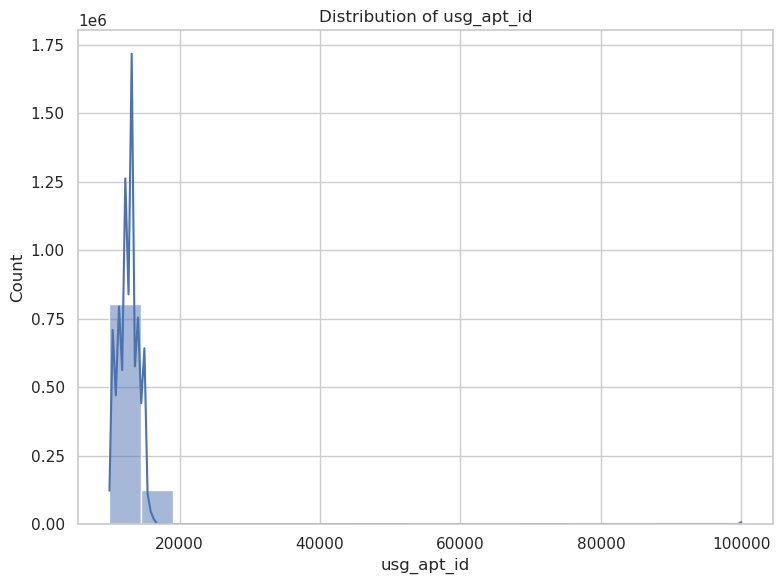

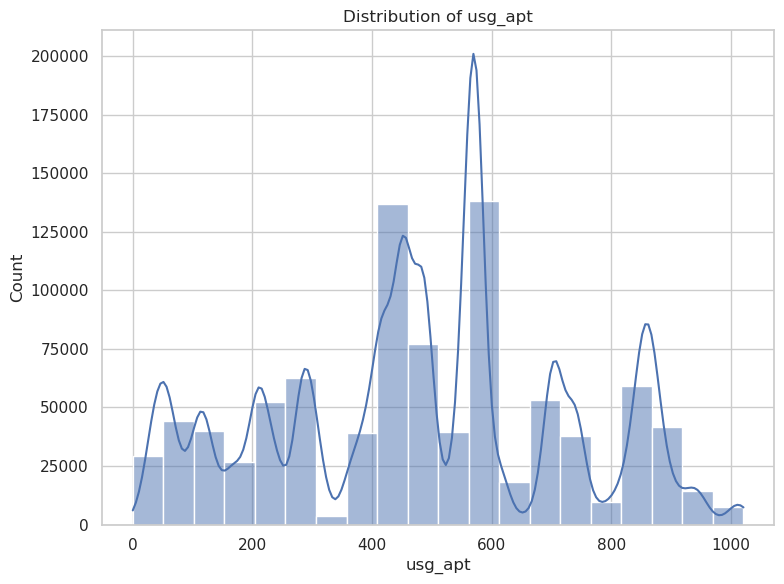

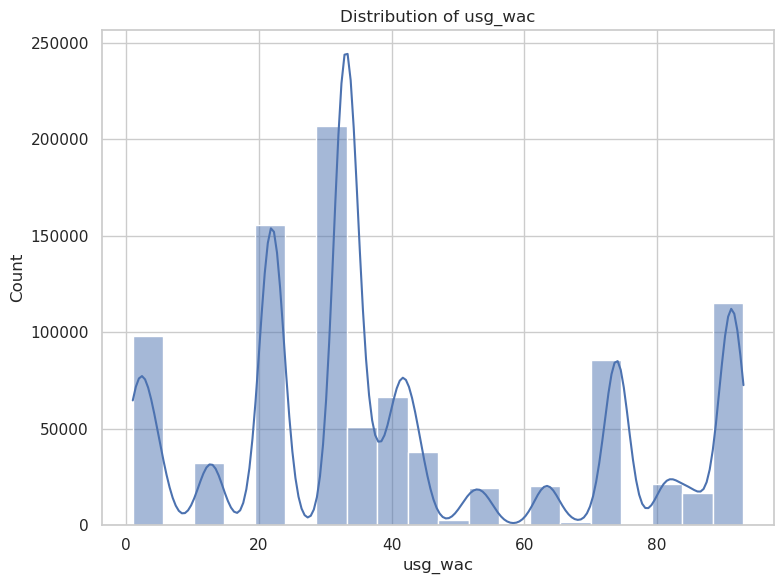

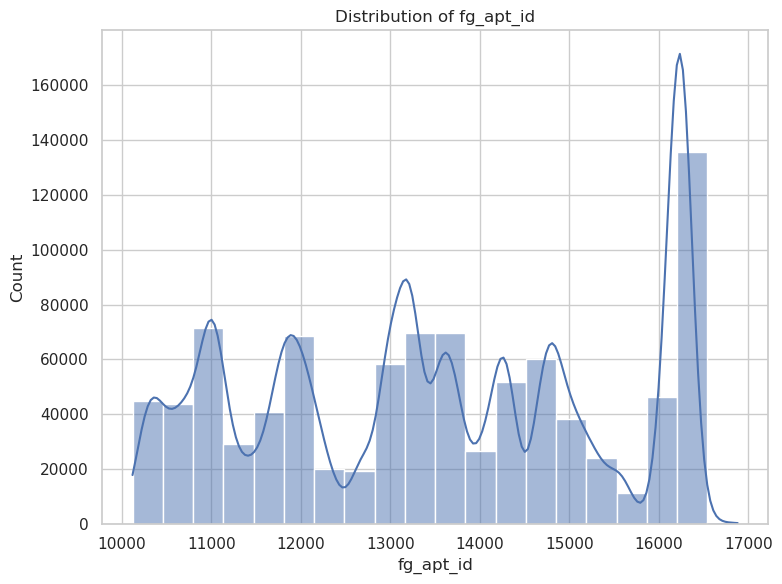

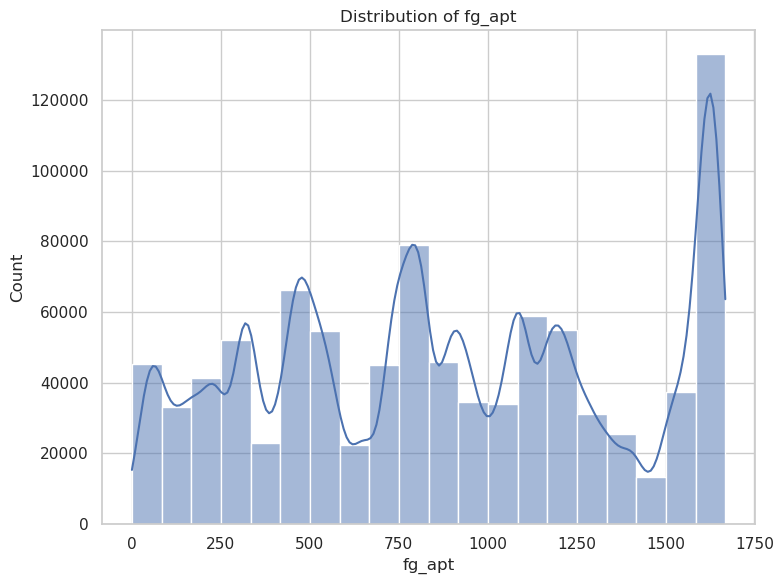

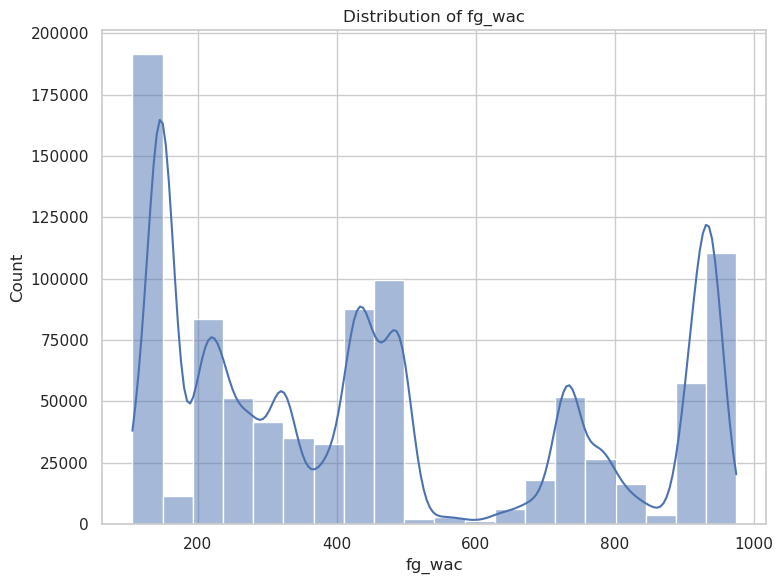

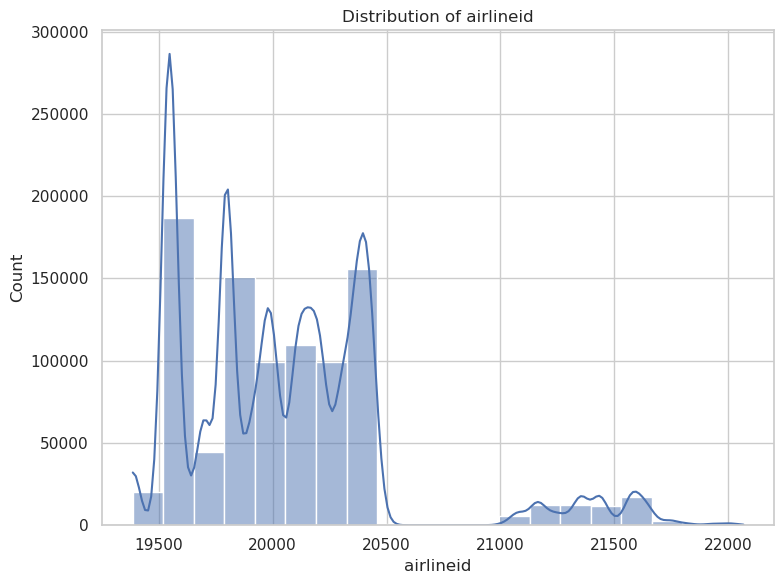

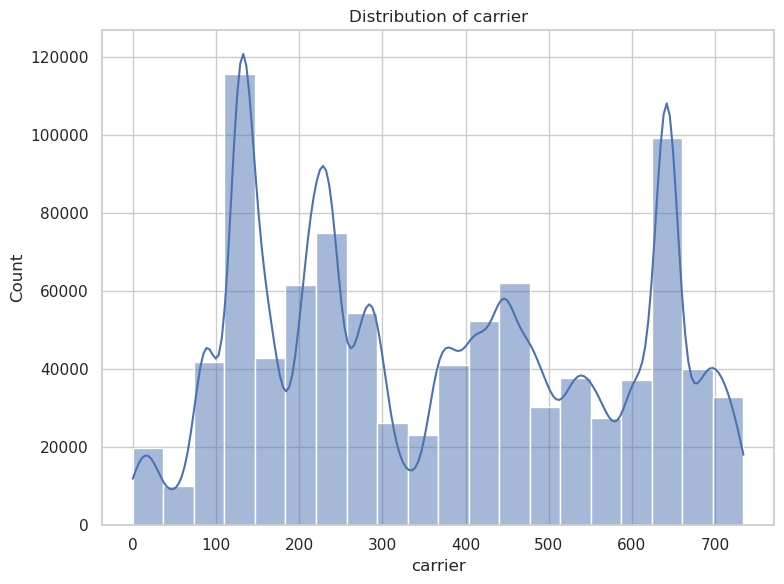

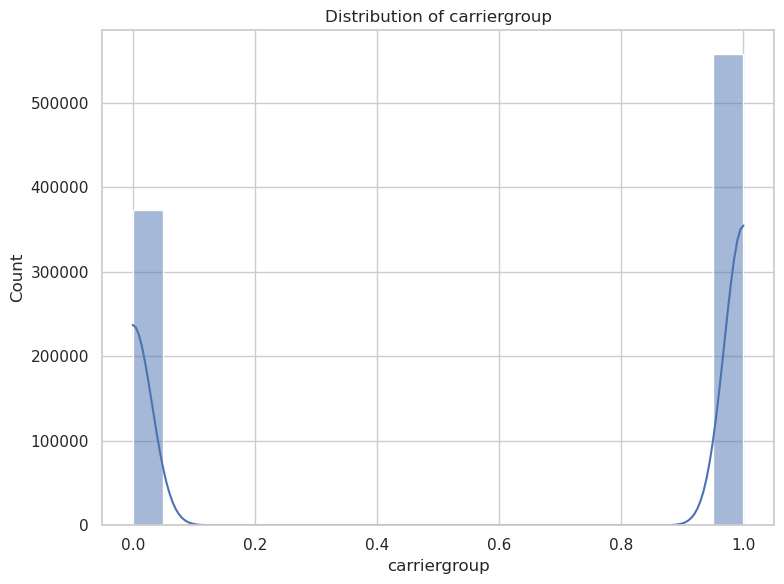

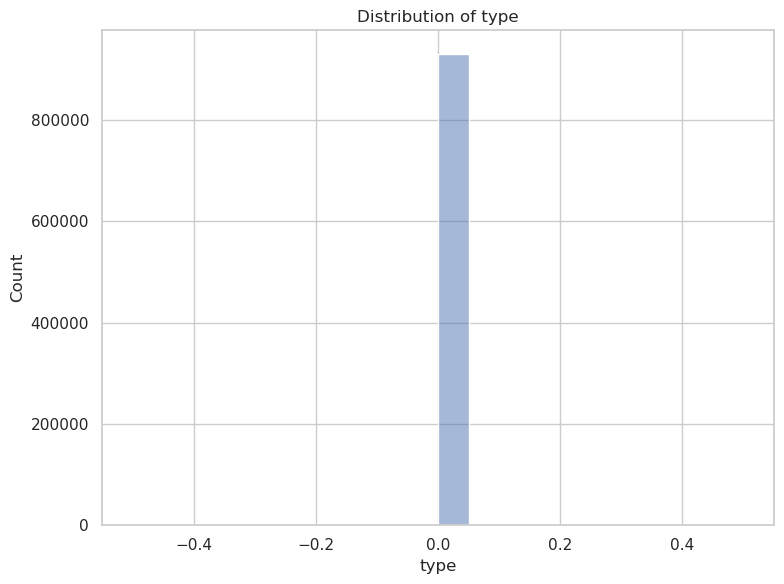

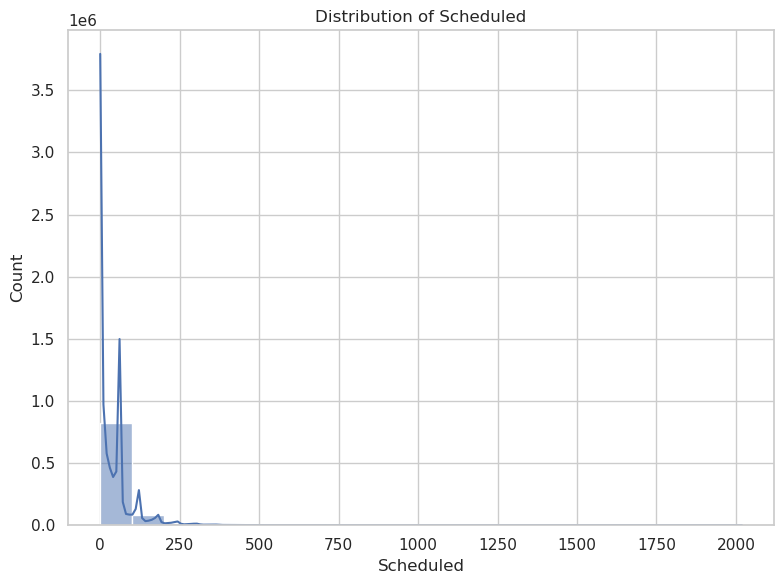

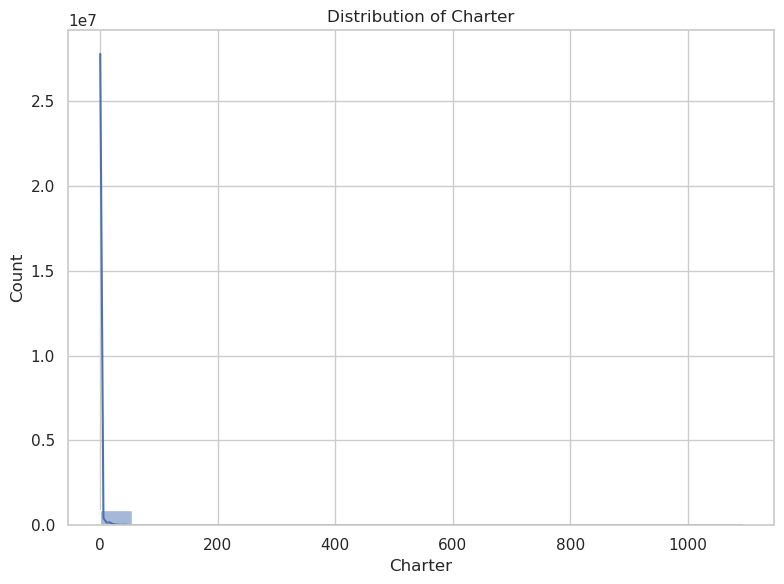

Select the problem type (1 for classification, 2 for regression):  2
Available algorithms:
1. Linear Regression
2. Lasso
3. Ridge
4. XGBoost
5. K-Nearest Neighbors
6. Support Vector Machine
Select the algorithm: 4
R2 Score: 1.00
Mean Absolute Error: 0.08
Root Mean Squared Error: 0.47
Mean Squared Error: 0.22


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from tkinter import Tk, filedialog
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(df):
    
    label_encoders = {}  # Store label encoders for each column || use for decoding it (New Feature will add soon Predictting With GUI by PYSimpleGui library)
    
    # Use for Check waht will do? ==>> drop NUlls OR Fill with Mean for Numeric columns and Mode for Categorical columnss
    def calculate_null_percentage(column): 
        total_rows = len(column)
        null_count = column.isnull().sum()
        return (null_count / total_rows) * 100
    
    def split_nulls(column):
        is_numeric = column.apply(lambda x: pd.api.types.is_numeric_dtype(x))
        numeric_nulls = column[is_numeric]
        string_nulls = column[~is_numeric]
        return numeric_nulls, string_nulls
    
    def fill_nulls(column):
        if pd.api.types.is_numeric_dtype(column):
            median_value = column.median()
            column.fillna(median_value, inplace=True)
        else:
            mode_value = column.mode()[0]
            column.fillna(mode_value, inplace=True)
    
    # Used to know which one is NUmbers in type Object like "10" or Which one is object ro make label encoding or which one numerical column 
    # Comming Soon ==>> Work with Date Format (It has some erros now)
    for column_name in df.columns:
        column_data = df[column_name]
        if df[column_name].dtype == 'object':
            try:
                converted_column = pd.to_numeric(column_data.str.strip('"'), errors='coerce')
                if not converted_column.isna().any():
                    df[column_name] = converted_column    
                   
                else:
                    label_encoder = LabelEncoder()
                    df["Length of Stay"]=pd.to_numeric(df["Length of Stay"],errors='coerce')

                    print(df[column_name])
                    encoded_values = label_encoder.fit_transform(df[column_name])
                    df[column_name] = encoded_values
                    label_encoders[column_name] = label_encoder
            except:
                pass
                
    
    # Drop rows with null values if Nulls not greater than 30%
    for column_name in df.columns:
        column = df[column_name]
        null_percentage = calculate_null_percentage(column)
        
        if null_percentage <= 30:
            print(f"Dropping rows with null values in '{column_name}'...")
            df = df[~column.isnull()]
        else:
            fill_nulls(column)
        numeric_nulls, string_nulls = split_nulls(column)
        print(f"Numeric Nulls in '{column_name}':\n{numeric_nulls}")
        print(f"String Nulls in '{column_name}':\n{string_nulls}")
    
    return df, label_encoders


root = Tk()
root.withdraw() 

file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])

if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
else:
    print("Unsupported file format. Exiting.")
    exit()
        
processed_df, label_encoders = preprocess_data(df)

print("Processed Data Types:")
print(processed_df.dtypes)
print("#" * 100)

print("Label Encoders:")
print(label_encoders)



######################################################################################
column_names = list(processed_df.columns)

for index, column_name in enumerate(column_names):
    print(f"{index}. {column_name}")

columns_to_drop = []

while True:
    choose = input("Enter the index of the column you want to drop, or type 'NO' to stop: ")
    
    if choose.upper() == "NO":
        break
    
    try:
        index_to_drop = int(choose)
        if index_to_drop >= 0 and index_to_drop < len(column_names):
            columns_to_drop.append(column_names[index_to_drop])
        else:
            print("Invalid index. Please choose a valid index.")
    except ValueError:
        print("Invalid input. Please enter a valid index or 'NO'.")

if columns_to_drop:
    processed_df.drop(columns=columns_to_drop, axis=1, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns were dropped.")

    
######################################################################################



column_names = list(processed_df.columns)

for index, column_name in enumerate(column_names):
    print(f"{index}. {column_name}")

choose = input("Enter the index of your target column: ")
try:
    target_index = int(choose)
    if target_index >= 0 and target_index < len(column_names):
        target_column = column_names[target_index]
        print(f"Target column: {target_column}")
    else:
        print("Invalid index. Please choose a valid index.")
        exit()
except ValueError:
    print("Invalid input. Please enter a valid index.")
    exit()


######################################################################################
sns.set(style="whitegrid")

# List of all columns (excluding the target column to make relation histogram with it
all_columns = df.columns.tolist()
all_columns.remove(target_column)

for column in all_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

######################################################################################
    

X = processed_df.drop(target_column, axis=1)
y = processed_df[target_column]

# Choose between classification and regression
problem_type = input("Select the problem type (1 for classification, 2 for regression): ")
if problem_type == "1":
    # Classification
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    algorithms = {
        "1": "Logistic Regression",
        "2": "Random Forest",
        "3": "XGBoost",
        # Comming Soon ==>> new models and can some NN or lstm
    }
    scoring_metric = "accuracy"
else:
    # Regression
    algorithms = {
        "1": "Linear Regression",
        "2": "Lasso",
        "3": "Ridge",
        "4": "XGBoost",
        "5": "K-Nearest Neighbors",
        "6": "Support Vector Machine",
        # Comming Soon ==>> new models and can some NN or lstm with kernel Linear
    }
    scoring_metric = "r2_score"

print("Available algorithms:")
for key, value in algorithms.items():
    print(f"{key}. {value}")

algorithm_choice = input("Select the algorithm: ")
if algorithm_choice in algorithms:
    chosen_algorithm = algorithms[algorithm_choice]
else:
    print("Invalid choice. Exiting.")
    exit()

if chosen_algorithm == "Linear Regression":
    model = LinearRegression()
elif chosen_algorithm == "Lasso":
    model = Lasso()
elif chosen_algorithm == "Ridge":
    model = Ridge()
elif chosen_algorithm == "XGBoost":
    model = XGBRegressor()
elif chosen_algorithm == "K-Nearest Neighbors":
    model = KNeighborsRegressor()
elif chosen_algorithm == "Support Vector Machine":
    model = SVR()
else:
    print("Invalid algorithm choice. Exiting.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

if problem_type == "1":
    # Classification
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    # Comming Soon ==>> USe F1 Score, recall, perception and more
else:
    # Regression
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R2 Score: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")


In [6]:
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,139,2006,5,12016,366,5,13162,783,844,20177,509,1,0,0,10,10
1,136,2003,5,10299,36,1,13856,979,736,20007,89,1,0,0,15,15
2,79,2007,3,10721,113,13,12651,642,439,20402,302,1,0,0,1,1
3,347,2004,12,11259,203,74,16271,1639,936,20201,147,1,0,0,1,1
4,142,2009,5,13303,572,33,11075,276,219,21323,86,0,0,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,193,2000,7,13303,572,33,13605,909,204,20398,449,1,0,1422,0,1422
930804,122,2019,4,13303,572,33,14286,1086,162,19770,211,0,0,1439,0,1439
930805,223,2000,8,13303,572,33,13605,909,204,20398,449,1,0,1441,0,1441
930806,257,2004,9,12266,418,74,15632,1425,148,19534,146,0,0,1461,0,1461
